In [1]:
import os
import yaml
import easyocr
import numpy as np
import pandas as pd
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#### Simple use case

Reduce your risk of coronavirus infection:
Clean hands with soap and water
or alcohol-based hand rub
Cover nose and mouth when coughing and
sneezing with tissue or flexed elbow
Avoid close contact with anyone with
cold or flu-like symptoms
Thoroughly cook meat and eggs
No unprotected contact with live wild
or farm animals
World Health
Organization


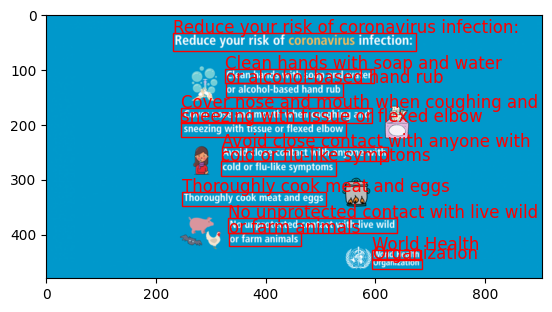

In [2]:
# english text OCR and visualize
reader = easyocr.Reader(['en'])
results = reader.readtext('image/english.png')

# load the image
image = plt.imread('image/english.png')

# create figure and axes
fig, ax = plt.subplots()

# display the image
ax.imshow(image)

# draw bounding boxes and text
for result in results:
    bbox, text, prob = result
    tl, tr, br, bl = bbox
    x = min(tl[0], bl[0])
    y = min(tl[1], tr[1])
    width = max(tr[0], br[0]) - x
    height = max(bl[1], br[1]) - y

    rect = patches.Rectangle((x, y), width, height, linewidth = 1, edgecolor = 'r', facecolor = 'none')

    ax.add_patch(rect)
    print(text)
    plt.text(x, y, text, fontsize = 12, color = 'r')

# show the figure
plt.show()

In [3]:
# chinese and english text OCR
# reader = easyocr.Reader(['ch_sim','en'], gpu = False) # for cpu only
reader = easyocr.Reader(['ch_sim', 'en'])
# reader.readtext('image/chinese.jpg', detail = 0) # for simpler output
result = reader.readtext('image/chinese.jpg')

result

[([[86, 80], [134, 80], [134, 128], [86, 128]], '西', 0.8113048940895737),
 ([[189, 75], [469, 75], [469, 165], [189, 165]], '愚园路', 0.957874469304693),
 ([[517, 81], [565, 81], [565, 123], [517, 123]], '东', 0.9941742876962145),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.9999933927534448),
 ([[514, 126], [574, 126], [574, 156], [514, 156]], '309', 0.9999631096149034),
 ([[79, 173], [125, 173], [125, 213], [79, 213]], 'W', 0.32453045282327153),
 ([[226, 170], [414, 170], [414, 220], [226, 220]],
  'Yuyuan Rd。',
  0.8595938469522018),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'E', 0.5594895933086832)]